 <h1><center>Film Industry Investment Analysis</center></h1>

<div>
<img src="attachment:film_company_logo.jpg" width="200"/>
   </div>![film%20company%20logo.jpg](attachment:film%20company%20logo.jpg)
<div style="text-align: center;">
<a href="https://www.vecteezy.com/free-vector/film-industry" style="font-size: 6px;">Film Industry Vectors by Vecteezy</a>
</div>

# **Overview**

This project analyzes which types of movies generate the most revenue at the box office. Descriptive analysis of movie data sets collected from Box Office Mojo, IMBD, Rotten Tomatoes, The Movie DB, and The Numbers, will highlight specific movie characteristics that increase ROI such as, studio location, film rating (R, PG, etc), and movie genre. This analysis can be used by the company to decide in which location to build a studio and help the company's new movie studio operate with the lowest risk in their new business endeavor.

# **Business Problem**

<div>
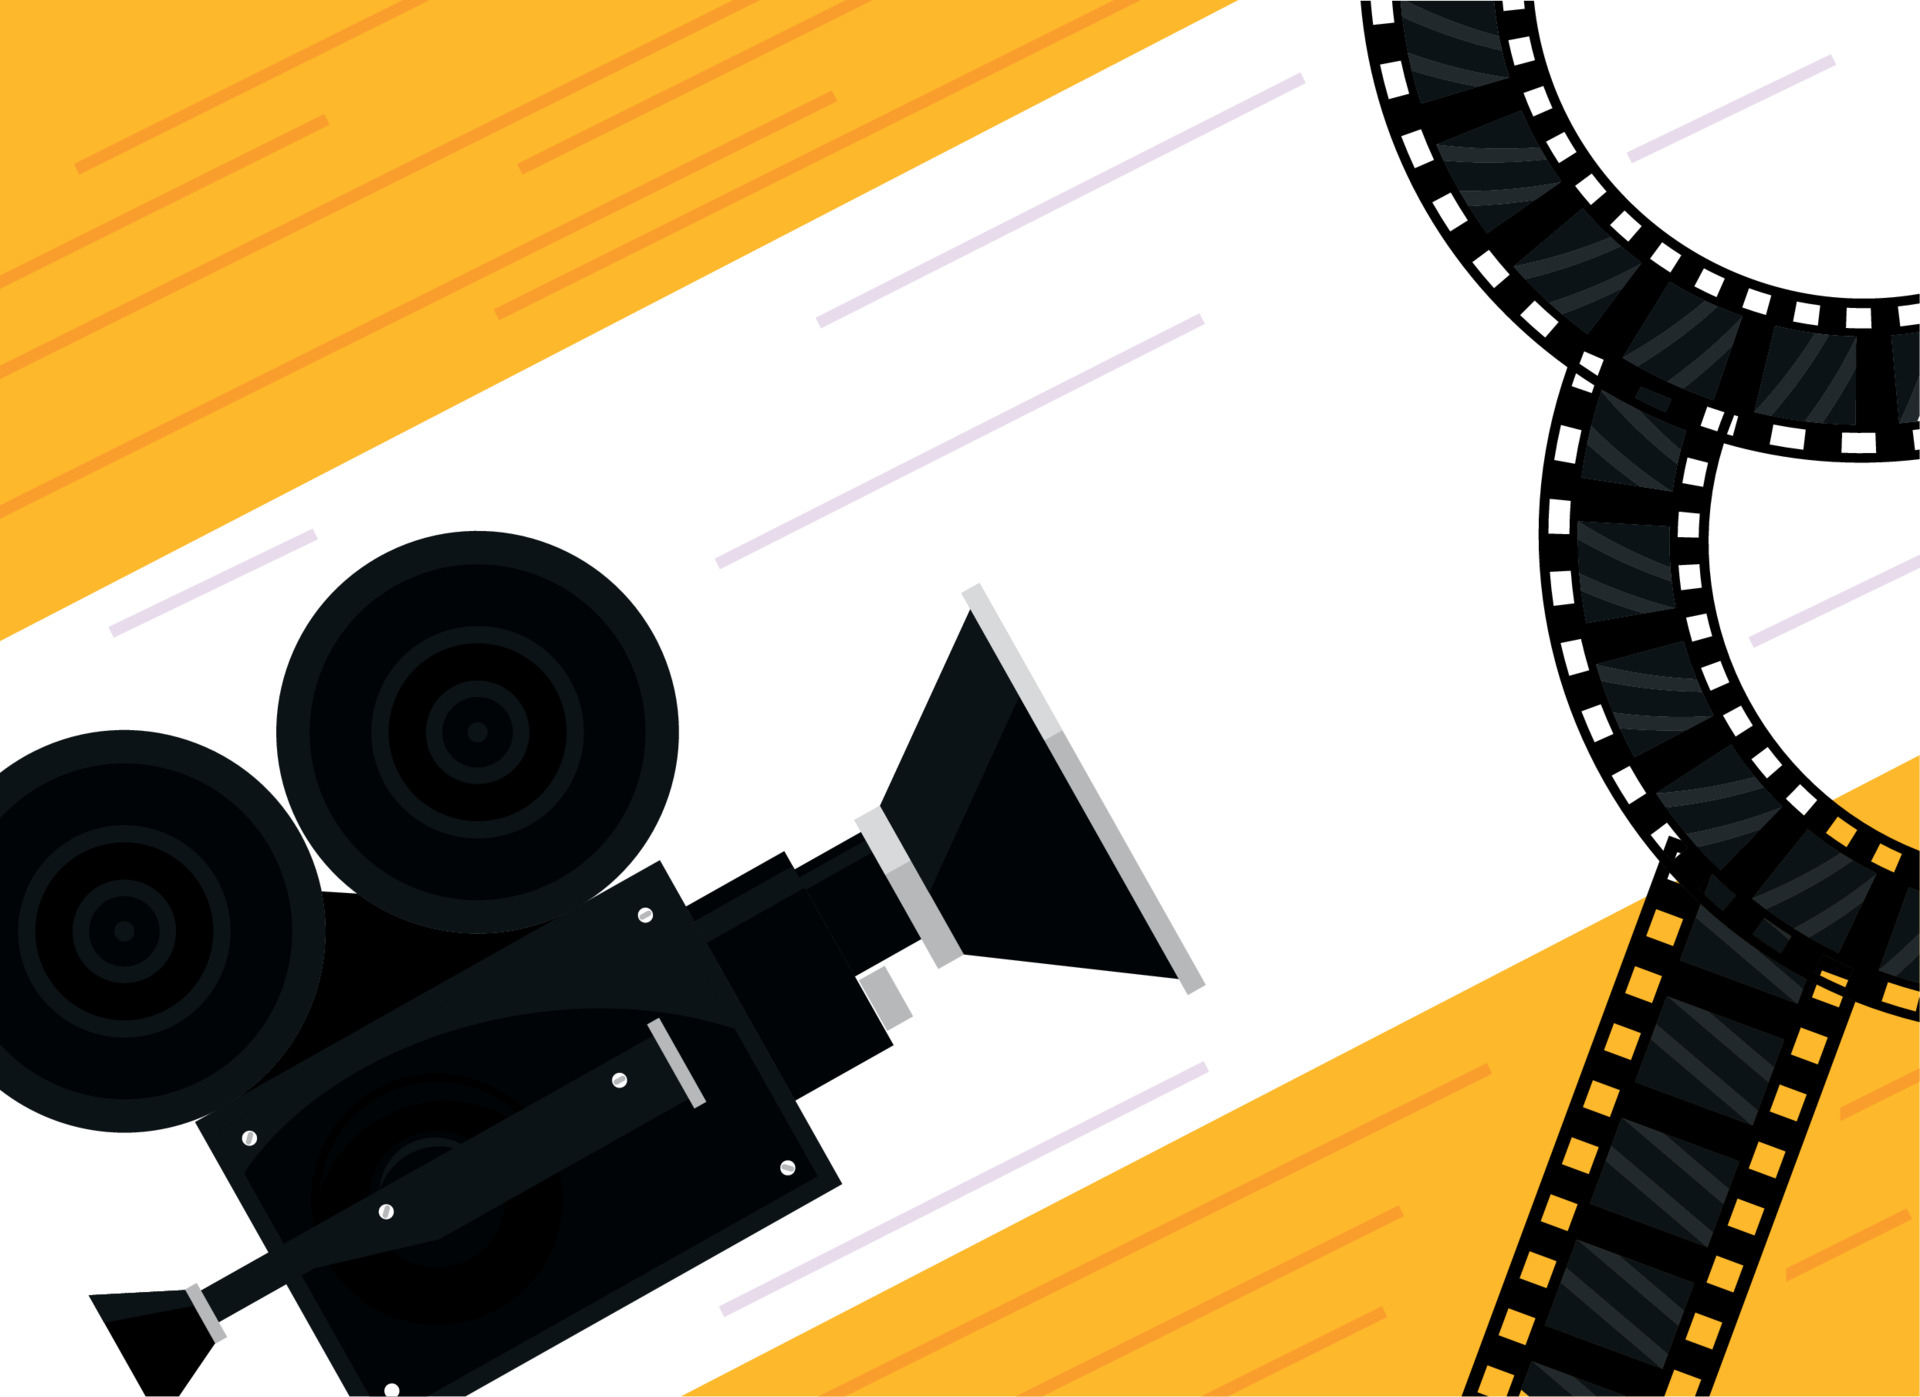
</div>
<div style="text-align: center;">

Analyzing several movie datasets can provide valuable insights that can lead to concrete business recommendations in various aspects of the film industry. When considering characteristics of a successful movie, I analyzed the movie data to identify movies with the greatest return on investment. Based on this analysis, which is explained below, I can recommend       . Furthermore, below are three recommendations based on my analysis:

1. Action Drama
2. Released in November or December
3. Long or very long runtime

It's important to note that any business recommendations derived from data analysis should be accompanied by careful consideration of the specific context, legal and regulatory requirements, and limitations of the dataset. Additionally, these recommendations should be subject to ongoing evaluation and refinement based on updated data and emerging industry practices.

# **Data Understanding**

The data has been collected from various locations. Different files have different formats. Some files are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

I have been provided a diagram for the IMDB data and will have to explore the other data to see how they connect to each other and the IMBD data.

<div>
<img src="attachment:IMBD%20data%20diagram.png" width="500"/>
</div>
<div style="text-align: center;">

# **Data Exploration**

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

#pd.options.display.float_format = '{:.2f}'.format

import sqlite3

conn = sqlite3.connect('Data/im.db')

import seaborn as sns
from glob import glob 

import cpi

%matplotlib inline

import functools 

pd.options.display.max_rows =999
pd.options.display.max_columns =999
np.set_printoptions(threshold=np.inf)#no trunkcated lists

There are a number of .csv and.tsv files provided in the zipped folder, I'll use glob to read them in by matching path names.

In [2]:
# Create a list of all csv files using glob
data_folder = './Data'
csv_files = glob(os.path.join(data_folder, '*.csv.gz'))
for i, file in enumerate(csv_files, 1):
    print(i, file, sep=': ')

1: ./Data/tmdb.movies.csv.gz
2: ./Data/tn.movie_budgets.csv.gz
3: ./Data/bom.movie_gross.csv.gz


Using the Name of the file as the key and and the Pandas Dataframe as the value, I'm creating a dictionary of DataFrames. I can preview all the data by iterrating over the dictionary this way.

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = os.path.splitext(os.path.basename(file))[0].replace('.csv', '').replace('.', '_')  # Clean filename
    file_df = pd.read_csv(file)  # Create DataFrame
    csv_dict[filename] = file_df  # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    print('Total numer of results:', len(df))
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook

tmdb_movies
Total numer of results: 26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


tn_movie_budgets
Total numer of results: 5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


bom_movie_gross
Total numer of results: 3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Again, I'll use the same process for the .tsv files  

In [5]:
# Create a list of all tsv files using glob
data_folder = './Data'
tsv_files = glob(os.path.join(data_folder, '*.tsv.gz'))

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = os.path.splitext(os.path.basename(file))[0].replace('.tsv', '').replace('.', '_')  # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df  # Insert DataFrame into dictionary

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    print('Total numer of results:', len(df))
    display(df) # Using display instead of print leads to neater formatting in Jupyter Notebook

rt_reviews
Total numer of results: 54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


rt_movie_info
Total numer of results: 1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


There are a number of DataFrames. I'll focus my analysis on the data frames that, I think, best answer my questions. 

The first DataFrame which stands out is tn_movie_budgets. This table shows the production budget, domestic and worldwide gross. This financial information will be valuable in exploring the meaning of profit. It will also distinguish which films perfomed best in the box office.

Additional tables that I will explore include: bom_movie_gross (domestic and worldwide profit), rt_movie_info (film rating and studio locations), and tmdb_movies (genre). I'll also be incorporating data from SQL movie_akas(studio location) and movie_basics (genre).

# **Data Preparation**

## Data Cleaning

The request from the investors is to recommend an airplane for them to invest. So this reqires knowing a specific make and model. Addressing missing values in the 'Model' and 'Make' columns requires thoughtful consideration, as these columns are crucial for identifying aircrafts involved in accidents. 

In [8]:
#Clean up 'bom_movie_gross'
movie_gross = csv_dict['bom_movie_gross']
#get summary
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


movie_gross will require that we convert the money related data types to intergers.

In [9]:
  '''
    calculates the ….. what (not how) - minimal implentation details, if  needed.
    -
    Input:
    df : Pandas dataframe, include the relavent column names
    -
    Output:
    summary : Pandas dataframe, details about new dataframe
    
    ###in line comments are what and how####(the one liners above the code)
    '''

# Define function to clean numbers
def numclean(df, col):
    '''
    Formats the float64 and the object values into integers. All
    NaN values within a specified column will be dropped from the data frame.
    -
    Input:
    df : Pandas dataframe, include the relavent column names
    col: A string that represents a column name
    -
    Output:
    df : Pandas dataframe, with integer and without Nan values
    '''

    # Convert to numeric, handling NaN values
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')
    
    # Drop rows with NaN values in the specified column
    df = df.dropna(subset=[col])

    return df


In [10]:
# Run function on the two columns
numclean(movie_gross,'foreign_gross')
numclean(movie_gross,'domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


There aren't any entries here that seem unusual. It's worth noting that the movies in this data base range in year from 2010-2018

tn_movie_budgets will require that the $ symbol, the comma seperator be removed and the number converted to an integer so it makes sense to define a function and then apply it to the necessary columns to increase efficiency.

In [12]:
#Clean up 'tn_movie_gross'
ww_gross = csv_dict['tn_movie_budgets']
ww_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# Convert release_date to a datetime object
ww_gross['release_date'] = pd.to_datetime(ww_gross['release_date'])

In [14]:
# Create year column 
ww_gross['year'] = pd.DatetimeIndex(ww_gross['release_date']).year

In [15]:
# Define function to clean numbers
def numclean2(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int64 type
    Returns DataFrame
    '''
    if df[col].dtype != 'int64':
        df[col]=df[col].str.replace('$','').str.replace(',','').astype('int64')

    return df

In [16]:
numclean2(ww_gross,'worldwide_gross')
numclean2(ww_gross,'domestic_gross')
numclean2(ww_gross,'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [17]:
ww_gross.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


This data table shows entries where the movie gross is zero, that's unusual and I'll dig into that. Additionally, the range of years represented in this data table span from 1915-2020.

In [18]:
#ww_gross[ww_gross['domestic_gross']==0]['domestic_gross'].value_counts()
len(ww_gross[(ww_gross['domestic_gross'] == 0) | (ww_gross['domestic_gross'].isnull())]) 

548

In [19]:
#ww_gross[ww_gross['worldwide_gross']==0]['worldwide_gross'].value_counts()
len(ww_gross[(ww_gross['worldwide_gross'] == 0) | (ww_gross['worldwide_gross'].isnull())]) 

367

In [20]:
#explore rows where the gross values are 0
#ww_gross[(ww_gross['domestic_gross']==0) & (ww_gross['worldwide_gross']==0)]
ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,2020-12-31,Moonfall,150000000,0,0,2020
479,80,2017-12-13,Bright,90000000,0,0,2017
480,81,2019-12-31,Army of the Dead,90000000,0,0,2019
535,36,2020-02-21,Call of the Wild,82000000,0,0,2020
617,18,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,2012
619,20,2019-01-22,Renegades,77500000,0,1521672,2019
670,71,2019-08-30,PLAYMOBIL,75000000,0,0,2019
671,72,2019-12-31,355,75000000,0,0,2019
820,21,2018-10-26,Air Strike,65000000,0,516279,2018
951,52,2015-12-11,The Ridiculous 6,60000000,0,0,2015


In [21]:
len(ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)])

548

There are 181 instances where the domestic gross is zero and the worldwide gross has a value. Some movies may have staggered release dates, may not be released in the USA, or simply the data was never entered and so there may not be values avaiable for every entry.

Further investigation could continue, but I will join these two data sets and then proceed to drop any data that still contains a zero value for the gross revenue.

## Profit and Profit Margin

The value of this venture relies on making a profit on the investment. Due to multiple revenue streams, it's challenging to understand whether or not a box office movie is ultimately profitable - and to whom. There is an abundance of information that takes careful consideration, in context, to interpret meaningfully. 

There are a number of factors to consider such as:
1. opening weekend ranking
2. percentage drop between the first and second weekends
3. production budget:gross profit difference
4. movie advertising (promotional budget)
5. percentage studio revenue
6. percentage theater revenue
7. foreign vs domestic gross profit
8. DVD/video-on-demand releases

For both a precise and accurate analysis, a concrete understanding of which variables the company would be owning would be needed. Due to the lack of detailed financial data available publically around movie profitability, this project will share a simplified analysis model based on publically available data.

In this analysis*, we will be analyzing domestic profit; defined as follows:
profit = domestic gross revenue - production budget
profit margin is defined to be:

profit margin = (domestic gross revenue - production budget) / domestic gross revenue *100

  *all values in this analysis have been adjusted for inflation for accurate comparison.

### Aggragating money data

In [22]:
#Create variables for dictionaries 
rt_movie_info = tsv_dict['rt_movie_info']
tmdb_movies = csv_dict['tmdb_movies']

In [23]:
# Print columns for tmdb_movies data frame
print('Columns in tmdb_movies:')
print(tmdb_movies.columns)

# Print columns for tn_movie_budgets data frame
print('Columns in ww_gross:')
print(ww_gross.columns)

# Print columns for bom_movie_gross data frame
print('Columns in movie_gross:')
print(movie_gross.columns)

Columns in tmdb_movies:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Columns in ww_gross:
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')
Columns in movie_gross:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [24]:
# Rename columns in ww_gross DataFrame
ww_gross = ww_gross.rename(columns={'movie': 'title'})

In [25]:
print(movie_gross.columns)
print(ww_gross.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')


In [26]:
len(movie_gross[(movie_gross['domestic_gross'] == 0) | (movie_gross['domestic_gross'].isnull())]) 

28

In [27]:
len(movie_gross[(movie_gross['foreign_gross'] == 0) | (movie_gross['foreign_gross'].isnull())])

1355

In [28]:
len(movie_gross[(movie_gross['foreign_gross'] == 0) & (movie_gross['domestic_gross'] == 0)])

0

In [29]:
len(ww_gross[(ww_gross['production_budget'] == 0) | (ww_gross['production_budget'].isnull())])

0

Given the number of null or zero values between the movie_gross and ww_gross data sets, it turns out that the total number of usable data points reporting a worldwide gross is 7419 and the total number of usable data points reporting a domestic gross is 8593. It makes sense to maximize the data points reporting revenue in order to advise stakeholders on the best way to increase ROI. All subsequent calculations will be based on available domestic revenue figures. 

should I consider foreign? should I do a small analysis of data to show that domestic films in general can be used as a solid indicator for ROI?

In [30]:
#len(movie_gross[(movie_gross['worldwide_gross'] == 0) | (movie_gross['worldwide_gross'].isnull())]) 

In [31]:
#movie_gross['worldwide_gross']= movie_gross['domestic_gross'] + movie_gross['foreign_gross']
#movie_gross

In [32]:
movie_gross['title'] = movie_gross['title'].str.lower()
ww_gross['title'] = ww_gross['title'].str.lower()

In [33]:
# Join the DataFrames using an 'outer' join to include all rows from both DataFrames
money_df = pd.merge(movie_gross, ww_gross, on=['title', 'year'], how='outer')
money_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaT,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,NaN,NaT,NaN,NaN,NaN
3,inception,WB,292600000.0,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...,...
7909,red 11,NaN,NaN,NaN,2018,78.0,2018-12-31,7000.0,0.0,0.000000e+00
7910,following,NaN,NaN,NaN,1999,79.0,1999-04-02,6000.0,48482.0,2.404950e+05
7911,return to the land of wonders,NaN,NaN,NaN,2005,80.0,2005-07-13,5000.0,1338.0,1.338000e+03
7912,a plague so pleasant,NaN,NaN,NaN,2015,81.0,2015-09-29,1400.0,0.0,0.000000e+00


In [34]:
# Convert release_date to a datetime object
money_df['release_date'] = pd.to_datetime(money_df['release_date'])

In [35]:
#Create columns and average values from two different data sets

# Calculate the average for domestic gross
money_df['avg_domestic_gross'] = money_df[['domestic_gross_x', 'domestic_gross_y']].replace(0, np.nan).mean(axis=1)

# Calculate the average for worldwide gross
#money_df['avg_worldwide_gross'] = money_df[['worldwide_gross_x', 'worldwide_gross_y']].replace(0, np.nan).mean(axis=1)

# Drop unnecessary columns
money_df.drop(['domestic_gross_x', 'domestic_gross_y', 'studio', 'id'], axis=1, inplace=True)

# Drop rows with NaN in 'avg_domestic_gross'
money_df.dropna(subset=['avg_domestic_gross'], inplace=True)

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
0,toy story 3,652000000.0,2010,2010-06-18,200000000.0,1.068880e+09,415002440.0
1,alice in wonderland (2010),691300000.0,2010,NaT,NaN,NaN,334200000.0
2,harry potter and the deathly hallows part 1,664300000.0,2010,NaT,NaN,NaN,296000000.0
3,inception,535700000.0,2010,2010-07-16,160000000.0,8.355246e+08,292588097.5
4,shrek forever after,513900000.0,2010,2010-05-21,165000000.0,7.562447e+08,238718393.5
...,...,...,...,...,...,...,...
7907,cavite,NaN,2006,2006-05-26,7000.0,7.164400e+04,70071.0
7908,the mongol king,NaN,2004,2004-12-31,7000.0,9.000000e+02,900.0
7910,following,NaN,1999,1999-04-02,6000.0,2.404950e+05,48482.0
7911,return to the land of wonders,NaN,2005,2005-07-13,5000.0,1.338000e+03,1338.0


In [36]:
money_df[money_df.duplicated(['title'], keep=False)].sort_values(by=['title'])

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
7752,"20,000 leagues under the sea",NaN,1916,1916-12-24,200000.0,8.000000e+06,8000000.0
6574,"20,000 leagues under the sea",NaN,1954,1954-12-23,5000000.0,2.820000e+07,28200000.0
4315,a monster calls,NaN,2017,2017-01-06,43000000.0,4.641453e+07,3740823.0
2435,a monster calls,43600000.0,2016,NaT,NaN,NaN,3700000.0
4531,a nightmare on elm street,NaN,2010,2010-04-30,35000000.0,1.177296e+08,63075011.0
7201,a nightmare on elm street,NaN,1984,1984-11-09,1800000.0,2.550451e+07,25504513.0
4810,aladdin,NaN,1992,1992-11-11,28000000.0,5.040502e+08,217350219.0
3418,aladdin,NaN,2019,2019-05-24,182000000.0,6.192343e+08,246734314.0
6321,albert nobbs,NaN,2011,2011-12-21,7500000.0,8.539003e+06,3014696.0
924,albert nobbs,2600000.0,2012,NaT,NaN,NaN,3000000.0


In [37]:
# Sort the DataFrame by 'title' and 'release_date'
money_df.sort_values(by=['title', 'release_date'], inplace=True)

# Find duplicates within one year of each other for each title
mask = money_df.duplicated(subset=['title'], keep=False)
duplicates = money_df[mask]

# Create a mask to identify duplicates with a difference of 1 in years
mask_within_one_year = (duplicates['year'].diff().abs() == 1)

# Filter out duplicates where the difference between years is 1
duplicates_within_one_year = duplicates[mask_within_one_year]

# Keep the rows with the 'release_date' and drop the other duplicates
to_drop = duplicates_within_one_year[duplicates_within_one_year['release_date'].isnull()].index
money_df.drop(to_drop, inplace=True)

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0
...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0


In [38]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7333 entries, 2093 to 5331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               7333 non-null   object        
 1   foreign_gross       1994 non-null   float64       
 2   year                7333 non-null   int64         
 3   release_date        5238 non-null   datetime64[ns]
 4   production_budget   5238 non-null   float64       
 5   worldwide_gross     5238 non-null   float64       
 6   avg_domestic_gross  7333 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 458.3+ KB


In [39]:
# Adjust $ columns for inflation using CPI
columns_to_adjust = ['worldwide_gross', 'avg_domestic_gross', 'foreign_gross', 'production_budget']

#money_df = money_df.astype({'avg_domestic_gross': 'int64', 'foreign_gross': 'int64'})

for column in columns_to_adjust:
    print (column)
    money_df[f'cpi_{column}'] = money_df.apply(lambda row: cpi.inflate(row[column], row['year']), axis=1)

money_df

worldwide_gross
avg_domestic_gross
foreign_gross
production_budget


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07
...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07


In [40]:
# Use plain formatting to remove scientific notation
money_df['cpi_worldwide_gross'] = pd.to_numeric(money_df['cpi_worldwide_gross'], errors='coerce')
money_df['cpi_production_budget'] = pd.to_numeric(money_df['cpi_production_budget'], errors='coerce')
money_df['cpi_foreign_gross'] = pd.to_numeric(money_df['cpi_foreign_gross'], errors='coerce')
money_df['cpi_avg_domestic_gross'] = pd.to_numeric(money_df['cpi_avg_domestic_gross'], errors='coerce')

# Create domestic_profit column
money_df['domestic_profit'] = money_df.apply(lambda x: (x['cpi_avg_domestic_gross']) - (x['cpi_production_budget']), axis = 1)

# Get summary statistics for profit
money_df['domestic_profit'].describe().apply(lambda x: format(x, 'f'))

count          5238.000000
mean       29936694.494074
std       138935555.292897
min      -351700264.263251
25%       -13793419.029572
50%          381850.456442
75%        37664699.763025
max      4100969672.507194
Name: domestic_profit, dtype: object

Profit and loss amounts vary greatly ranging from approximately (in US Dollars) 350 million in losses to 4 billion in profits. The median indicates a movie profit of approximately 380 thousand.

In [41]:
# Calculate the domestic profit margin for each movie and make a new column
money_df['domestic_profit_margin'] = (money_df['domestic_profit'] / money_df['cpi_avg_domestic_gross']) * 100

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07,-2.582075e+07,-73.464470
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07,-3.340371e+07,-191.926286
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08,2.332443e+08,56.048351
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07,-2.484377e+07,-400.166874


Some of the % don't add to 100% so the difference may be attributed to documenting movie gross profits at different times during the movie's run time. If the value is negative, it may mean a profit loss.

Let's visualize how many movies were profitable (domestic_profit/=profit margine as defined above)

In [42]:
#'sand' - #E2CA76
#'light gold' - #FDDC5C
#'maize' - #F4D054
#'goldenrod' - #F9A602
#'macaroni and cheese' - #EFB435
#'gold' - #DBB40C
#'dark gold' - #A58F0D
#'ochre' - #BF9B0C
#'black' - #000000

# Define film company custom color palette using XKCD color names
film_company_palette = sns.xkcd_palette(['sand', 'light gold', 'maize', 'goldenrod', 'macaroni and cheese', 'gold', 'dark gold', 'ochre', 'black'])

# Set the custom palette
sns.set_palette(film_company_palette)
film_company_palette

[(0.8862745098039215, 0.792156862745098, 0.4627450980392157),
 (0.9921568627450981, 0.8627450980392157, 0.3607843137254902),
 (0.9568627450980393, 0.8156862745098039, 0.32941176470588235),
 (0.9803921568627451, 0.7607843137254902, 0.0196078431372549),
 (0.9372549019607843, 0.7058823529411765, 0.20784313725490197),
 (0.8588235294117647, 0.7058823529411765, 0.047058823529411764),
 (0.7098039215686275, 0.5803921568627451, 0.06274509803921569),
 (0.7490196078431373, 0.5647058823529412, 0.0196078431372549),
 (0.0, 0.0, 0.0)]

In [43]:
# Print information about money_df
print('money_df Movie Info:')
print('Total number of results:', len(money_df))
money_df

money_df Movie Info:
Total number of results: 7333


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07,-2.582075e+07,-73.464470
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07,-3.340371e+07,-191.926286
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08,2.332443e+08,56.048351
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07,-2.484377e+07,-400.166874


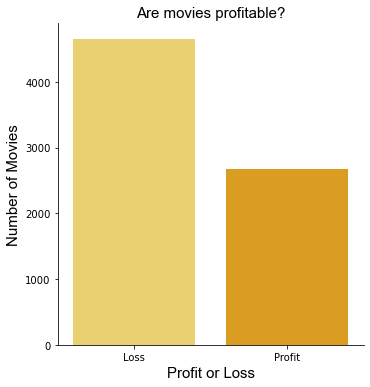

In [44]:
# ww_profit column has both positive and negative values
money_df['Profit or Loss'] = money_df['domestic_profit'].apply(lambda x: 'Profit' if x >= 0 else 'Loss')

#def profit_loss(x):
# if x:
#  if x >= 0:
#   return “Profit”
#  else: 
#   return “Loss”
# else:
#  return x
#merged_df2['Profit or Loss'] = merged_df2['ww_profit'].apply(profit_loss)
# Plot count of positive vs negative profit margins
sns.catplot(x='Profit or Loss', kind='count', palette=['#FDDC5C','#F9A602'], data=money_df)
plt.xlabel('Profit or Loss', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Number of Movies', fontfamily = 'Arial', fontsize = 15)
plt.title('Are movies profitable?', fontfamily = 'Arial', fontsize = 15)
plt.show()

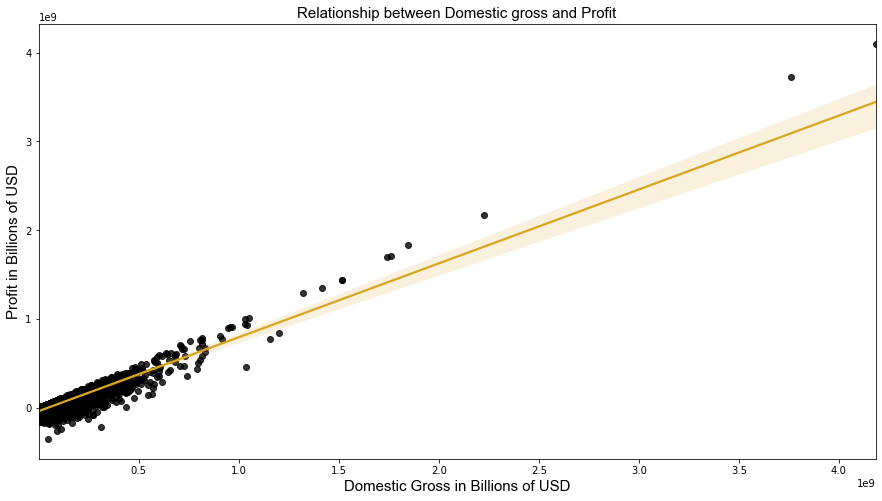

In [45]:
# Plot relationship between profit and worldwide gross
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the Q-Q plot with specified colors
# 'results.resid' contains the residuals from the model
# 'dist=norm' specifies the normal distribution
# 'line="45"' draws the 45-degree reference line
# 'fit=True' fits a line to the quantiles
# 'ax=ax' specifies the axis for plotting
#sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)

# Customize the appearance of the data points (color to gold - '#DAA520')
#ax.get_lines()[0].set_markeredgecolor('#DAA520')
#ax.get_lines()[0].set_markerfacecolor('#DAA520')

# Customize the appearance of the reference line (in black)
#ax.get_lines()[1].set_color('black')

sns.regplot(
    x='cpi_avg_domestic_gross',
    y='domestic_profit',
    data= money_df,
    scatter_kws={"color": 'black'},
    line_kws={"color": '#DAA520'},
    ci=95,  # Adjust the confidence interval
)

plt.title('Relationship between Domestic gross and Profit', fontfamily = 'Arial', fontsize = 15)
plt.xlabel('Domestic Gross in Billions of USD', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Profit in Billions of USD', fontfamily = 'Arial', fontsize = 15)

plt.show()

This plot shows a strong, positive, linear association between profit and domestic gross with a few outliers. 

This means that I can assume (based on how profit has been previously defined), that top grossing films are also the most profitable.  

Next is an exploration into profit a little further to understand the difference between profit and profit margin and realize which one serves as a better measurement for understanding the costs associated with making movies. Since it's been shown that top grossing movies are the most profitable, the top 100 grossing movies will be considered in this analysis.

In [46]:
# Set top_grossing as top 100 movies
top_grossing = money_df.sort_values('cpi_avg_domestic_gross', ascending = False)[:100]

In [47]:
# Describe profit
# Use plain format to remove scientific notation - improves readability
top_grossing['domestic_profit'].describe().apply(lambda x: format(x, 'f'))

count            95.000000
mean      688124987.467379
std       603250927.596687
min       143458333.333333
25%       400917965.332795
50%       525636019.034479
75%       758973492.785154
max      4100969672.507194
Name: domestic_profit, dtype: object

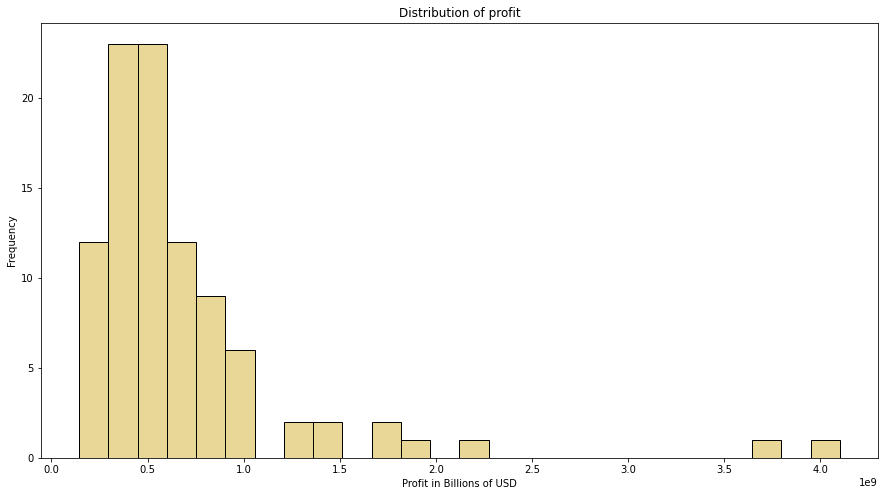

In [48]:
# Plot distribution of profit using histplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['domestic_profit'])
plt.title('Distribution of profit')
plt.xlabel('Profit in Billions of USD')
plt.ylabel('Frequency')
plt.show()

This graph shows that the median profit is approximately 500 million US dollars.

In [49]:
# Create profit margin column
#merged_df2['profit_margin'] = merged_df2.apply(lambda x: ((x['ww_profit']) / (x['cpi_worldwide_gross']))*100, axis = 1)

# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
money_df['domestic_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        5238.000000
mean        -4459.698385
std         70484.653187
min      -3267873.856209
25%          -156.738678
50%             2.931248
75%            55.418350
max            99.944444
Name: domestic_profit_margin, dtype: object

There is a significant outlier with a large negative value. Additionally, a considerable portion of these movies have a negative profit margin, indicating a loss. So again, the analysis will only consider the top 100 grossing movies.

In [50]:
# Set top_grossing as top 100 movies
#top_grossing = merged_df2.sort_values('cpi_worldwide_gross', ascending = False)[:100]
# Describe profit
top_grossing['domestic_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count    95.000000
mean     78.025317
std      18.441036
min      26.315789
25%      65.397128
50%      84.079182
75%      94.716262
max      99.324348
Name: domestic_profit_margin, dtype: object

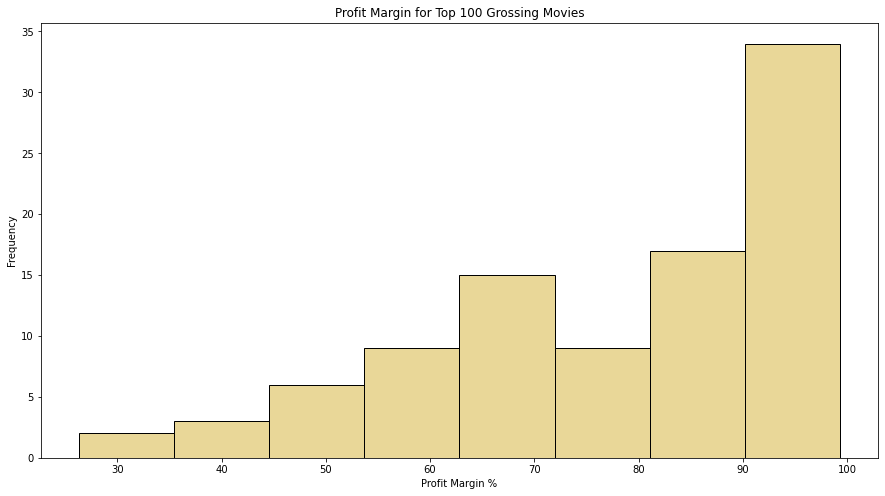

In [51]:
# Plot distribution of profit margin for top_grossing using distplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['domestic_profit_margin'])
plt.title('Profit Margin for Top 100 Grossing Movies')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.show()

The median profit margin for a top 100 all-time grossing movie is approximately 85%

In [52]:
# Get top profit movies 
top_profit = top_grossing.sort_values('domestic_profit', ascending = False)
top_profit

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7073,pinocchio,NaN,1940,1940-02-09,2289247.0,8.430000e+07,84300000.0,1.762201e+09,1.762201e+09,NaN,4.785426e+07,1.714347e+09,97.284405,Profit
7074,fantasia,NaN,1940,1940-11-13,2280000.0,8.332000e+07,83320000.0,1.741715e+09,1.741715e+09,NaN,4.766096e+07,1.694054e+09,97.263562,Profit
6232,the sound of music,NaN,1965,1965-03-02,8200000.0,2.862143e+08,163214286.0,2.659112e+09,1.516364e+09,NaN,7.618321e+07,1.440181e+09,94.975930,Profit
5832,the exorcist,NaN,1973,1973-12-26,12000000.0,4.282145e+08,230347346.0,2.822502e+09,1.518295e+09,NaN,7.909595e+07,1.439199e+09,94.790476,Profit
5831,jaws,NaN,1975,1975-06-20,12000000.0,4.707000e+08,260000000.0,2.560459e+09,1.414318e+09,NaN,6.527621e+07,1.349042e+09,95.384615,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


In [53]:
# Get top profit margin movies 
top_margin = top_grossing.sort_values('domestic_profit_margin', ascending = False)
top_margin

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
7521,american graffiti,NaN,1973,1973-08-11,777000.0,1.400000e+08,115000000.0,9.227860e+08,7.580028e+08,NaN,5.121462e+06,7.528814e+08,99.324348,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
7507,billy jack,NaN,1971,1971-01-01,800000.0,9.800000e+07,98000000.0,7.081528e+08,7.081528e+08,NaN,5.780840e+06,7.023720e+08,99.183673,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7384,rocky,NaN,1976,1976-11-21,1000000.0,2.250000e+08,117235147.0,1.157247e+09,6.029781e+08,NaN,5.143322e+06,5.978347e+08,99.147013,Profit
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
6899,national lampoon's animal house,NaN,1978,1978-07-28,3000000.0,1.416000e+08,141600000.0,6.355820e+08,6.355820e+08,NaN,1.346572e+07,6.221163e+08,97.881356,Profit
7014,blazing saddles,NaN,1974,1974-02-07,2600000.0,1.195000e+08,119500000.0,7.093767e+08,7.093767e+08,NaN,1.543414e+07,6.939426e+08,97.824268,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


This is interesting, note that the movies with the all-time highest profit differ from those with the highest all-time profit margin. 

### Aggragating more release date and title names

In [54]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [55]:
# Change the movie titles to lowercase
tmdb_movies['original_title'] = tmdb_movies['original_title'].str.lower()
tmdb_movies['title'] = tmdb_movies['title'].str.lower()

# Create year column 
tmdb_movies['year'] = pd.DatetimeIndex(tmdb_movies['release_date']).year

tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,laboratory conditions,0.600,2018-10-13,laboratory conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_exhibit_84xxx_,0.600,2018-05-01,_exhibit_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,the last one,0.600,2018-10-01,the last one,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,trailer made,0.600,2018-06-22,trailer made,0.0,1,2018


In [56]:
many_titles_df = pd.merge(money_df, tmdb_movies, on=['title', 'year'], how='outer')
many_titles_df

,title,foreign_gross,year,release_date_x,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN,Loss,14303.0,"[53, 28, 18, 10752]",252178.0,en,'71,10.523,2015-02-27,6.8,627.0
1,(500) days of summer,NaN,2009,2009-07-17,7500000.0,34439060.0,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174,Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,108286422.0,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370,Profit,17422.0,"[53, 878, 18]",333371.0,en,10 cloverfield lane,17.892,2016-03-11,6.9,4629.0
4,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,14616.0,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240,Loss,15907.0,[18],345003.0,en,10 days in a madhouse,0.955,2015-11-20,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31368,laboratory conditions,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,laboratory conditions,0.600,2018-10-13,0.0,1.0
31369,_exhibit_84xxx_,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,_exhibit_84xxx_,0.600,2018-05-01,0.0,1.0
31370,the last one,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,the last one,0.600,2018-10-01,0.0,1.0
31371,trailer made,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,trailer made,0.600,2018-06-22,0.0,1.0


In [57]:
# Fill NaN or 0.0 cells in column release_date_y with value from release_date_x
many_titles_df['release_date_y'].fillna(many_titles_df['release_date_x'], inplace=True)

# Drop the 'release_date_x' column
many_titles_df.drop(columns=['release_date_x'], inplace=True)

# Rename 'release_date_y' to 'release_date'
many_titles_df.rename(columns={'release_date_y': 'release_date'}, inplace=True)

# Drop the 'id_x and _y columns' columns
many_titles_df.drop(columns=['id', 'Unnamed: 0'], inplace=True)

many_titles_df.drop_duplicates()

many_titles_df

,title,foreign_gross,year,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,'71,355000.0,2015,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN,Loss,"[53, 28, 18, 10752]",en,'71,10.523,2015-02-27,6.8,627.0
1,(500) days of summer,NaN,2009,7500000.0,34439060.0,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174,Profit,NaN,NaN,NaN,NaN,2009-07-17 00:00:00,NaN,NaN
2,"1,000 times good night",NaN,2014,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN,Loss,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,10 cloverfield lane,38100000.0,2016,5000000.0,108286422.0,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370,Profit,"[53, 878, 18]",en,10 cloverfield lane,17.892,2016-03-11,6.9,4629.0
4,10 days in a madhouse,NaN,2015,12000000.0,14616.0,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240,Loss,[18],en,10 days in a madhouse,0.955,2015-11-20,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31368,laboratory conditions,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,laboratory conditions,0.600,2018-10-13,0.0,1.0
31369,_exhibit_84xxx_,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,_exhibit_84xxx_,0.600,2018-05-01,0.0,1.0
31370,the last one,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,the last one,0.600,2018-10-01,0.0,1.0
31371,trailer made,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,trailer made,0.600,2018-06-22,0.0,1.0


In [58]:
# Replace NaN values in 'original_title' with values from 'title'
many_titles_df['original_title'].fillna(many_titles_df['title'], inplace=True)

# Replace NaN values in 'title' with values from 'original_title'
many_titles_df['title'].fillna(many_titles_df['original_title'], inplace=True)


In [59]:
# Find and count duplicates between the two columns
duplicate_count = many_titles_df[many_titles_df.duplicated(subset=['original_title', 'title'], keep=False)].shape[0]

print(f"Number of duplicate titles between 'original_title' and 'title': {duplicate_count}")


Number of duplicate titles between 'original_title' and 'title': 3924


In [60]:
# Create a boolean mask to identify rows where values in the two columns differ
mask = many_titles_df['original_title'] != many_titles_df['title']

# Extract rows with differences in the specified columns
differing_rows = many_titles_df[mask][['original_title', 'title']]

# Print the differing rows
print("Rows with differences in 'original_title' and 'title':")
print(differing_rows)

# Print the length of the list
f"Number of differing rows: {len(differing_rows)}"

Rows with differences in 'original_title' and 'title':
                     original_title                            title
18                           十三人の刺客                     13 assassins
21                            elser                       13 minutes
29                             辛亥革命                             1911
36                       टू स्टेट्स                         2 states
103                         7 cajas                          7 boxes
...                             ...                              ...
31277        czarne lusterko: 69.90       little black mirror: 69.90
31292  el verano del león eléctrico  the summer of the electric lion
31301             contes de juillet                       july tales
31353              la última virgen                  the last virgin
31365                     dreamaway                       dream away

[2532 rows x 2 columns]


'Number of differing rows: 2532'

In [61]:
# Drop the 'original_title' column
many_titles_df.drop(columns=['original_title'], inplace=True)

### Extract and aggragate SQLite Tables to Pandas dataframe

In [62]:
table_names = ['movie_basics', 'writers', 'directors', 'persons']

# Create an empty dictionary to store DataFrames
SQL_dataframes = {}

# Loop through table names and read data into DataFrames
for table in table_names:
    sql_query = f'SELECT * FROM {table}'
    SQL_dataframes[table] = pd.read_sql(sql_query, conn)


In [63]:
# Preview the data from SQL DataFrames
for name, df in SQL_dataframes.items():
    print(name)
    print('Total number of results:', len(df))
    display(df)  # Using display instead of print leads to neater formatting in Jupyter Notebook
    print(df.info())
    print('------------------ \n')


movie_basics
Total number of results: 146144


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
------------------ 

writers
Total number of results: 255873


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None
------------------ 

directors
Total number of results: 291174


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None
------------------ 

persons
Total number of results: 606648


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None
------------------ 



In [64]:
# Access the 'movie_basics' DataFrame from the SQL_dataframes dictionary
movie_basics_df = SQL_dataframes['movie_basics']

# Create a copy of the DataFrame to avoid altering the original
movie_basics_ga = movie_basics_df.copy()

# Merge the DataFrames on 'primary_title' and 'start_year' in 'movie_basics_ga' with 'title' and 'year' in 'many_titles_df'
main_df = pd.merge(
    movie_basics_ga, 
    many_titles_df, 
    left_on=['primary_title', 'start_year'], 
    right_on=['title', 'year'], 
    how='outer'
).drop_duplicates()



print('Total number of results:', len(main_df))
main_df

Total number of results: 176449


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,foreign_gross,year,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177464,NaN,NaN,NaN,NaN,NaN,NaN,laboratory conditions,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,0.6,2018-10-13,0.0,1.0
177465,NaN,NaN,NaN,NaN,NaN,NaN,_exhibit_84xxx_,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,0.6,2018-05-01,0.0,1.0
177466,NaN,NaN,NaN,NaN,NaN,NaN,the last one,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0
177467,NaN,NaN,NaN,NaN,NaN,NaN,trailer made,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,0.6,2018-06-22,0.0,1.0


In [65]:
# Convert strings to lowercase in 'primary_title_y' and 'title' columns
main_df['primary_title'] = main_df['primary_title'].str.lower()

# Convert strings to lowercase in 'original_title' and 'title' columns
main_df['original_title'] = main_df['original_title'].str.lower()

# Find and count duplicates between the two columns
duplicate_count = main_df[main_df.duplicated(subset=['primary_title', 'title'], keep=False)].shape[0]

print(f"Number of duplicate titles between 'primary_title' and 'title': {duplicate_count}")

Number of duplicate titles between 'primary_title' and 'title': 19165


In [66]:
# Fill NaN or 0.0 cells in column primary_title with value from title
main_df['primary_title'].fillna(main_df['title'], inplace=True)

# Fill NaN or 0.0 cells in column primary_title with value from original_title
main_df['primary_title'].fillna(main_df['original_title'], inplace=True)

# Fill NaN or 0.0 cells in column start_year with value from year
main_df['start_year'].fillna(main_df['year'], inplace=True)

# Drop the 'year' column
main_df.drop(columns=['year'], inplace=True)

# Rename 'start_year' to 'years'
main_df.rename(columns={'start_year': 'release_year'}, inplace=True)

# Drop the 'title' column
main_df.drop(columns=['title','original_title'], inplace=True)

# Rename 'primary_title' to 'title'
main_df.rename(columns={'primary_title': 'title'}, inplace=True)

main_df

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177464,NaN,laboratory conditions,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,0.6,2018-10-13,0.0,1.0
177465,NaN,_exhibit_84xxx_,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,0.6,2018-05-01,0.0,1.0
177466,NaN,the last one,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0
177467,NaN,trailer made,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,0.6,2018-06-22,0.0,1.0


In [67]:
# Check for duplicates in the 'title' column
title_year_duplicates = main_df.duplicated(subset=['title','release_year'], keep=False)

# Display a sample of rows with duplicate titles
sample_duplicates = main_df[title_year_duplicates].sort_values(by='title')
sample_duplicates

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
168121,NaN,#allmymovies,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[99],en,0.840,2015-11-12,9.0,4.0
128223,tt7853996,#allmymovies,2015.0,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173604,NaN,#captured,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[27],en,1.418,2017-10-11,3.2,6.0
115921,tt6856592,#captured,2017.0,81.0,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170488,NaN,#followfriday,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[53],en,1.646,2016-07-01,3.2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67442,tt3815128,ângelo de sousa - tudo o que sou capaz,2010.0,60.0,"Biography,Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67445,tt3815134,ângelo de sousa - tudo o que sou capaz,2010.0,60.0,"Biography,Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67441,tt3815126,ângelo de sousa - tudo o que sou capaz,2010.0,60.0,"Biography,Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93108,tt6412726,çagrilan,2016.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# split out main_df into duplicates and unique

main_df_unique = main_df[~title_year_duplicates].copy()

# Handle duplicates and concat them back to the above unique df

main_df_dups = main_df[title_year_duplicates].copy()
main_df_dups

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
2,tt0069049,the other side of the wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,tt0192528,heaven & hell,2018.0,104.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,tt0250404,godfather,2012.0,NaN,"Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,tt3270104,godfather,2012.0,145.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,tt0255820,return to babylon,2013.0,75.0,"Biography,Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177458,NaN,evolution 4k,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[99],de,0.6,2018-06-12,1.0,1.0
177460,NaN,eden,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],en,0.6,2018-11-25,0.0,1.0
177463,NaN,closing time,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[27],en,0.6,2018-02-24,0.0,1.0
177466,NaN,the last one,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0


In [69]:
#Get value counts
title_counts = main_df_dups['title'].value_counts()

# Filter titles that appear more than twice
titles_more_than_twice = title_counts[title_counts > 2].index.tolist()

# Display the titles
print("Titles listed more than twice:")
print(len(titles_more_than_twice))

Titles listed more than twice:
805


It looks like some of the films may have multiple release years, which is a factor to consider in removing duplicates.

In [70]:
# Define a custom function to choose the longer of the two genres
def choose_longer_genre(series):
    if series.isnull().any():
        # If one of the values is missing, choose the non-null value
        return next((value for value in series.dropna()), None)
    else:
        # If both values are present, choose the longer one
        return max(series, key=len)

# Apply the custom function to the 'genres' column
main_df_dups['genres'] = main_df_dups.groupby(['title', 'release_year'])['genres'].transform(choose_longer_genre)



cols_to_fill = ['runtime_minutes','release_date','movie_id','cpi_avg_domestic_gross']  # Replace with your actual column names

# Forward fill NaN values from the next row
main_df_dups[cols_to_fill] = main_df_dups.groupby(['title', 'release_year'])[cols_to_fill].transform(lambda x: x.ffill().bfill())
main_df_dups

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
2,tt0069049,the other side of the wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-02,NaN,NaN
17,tt0192528,heaven & hell,2018.0,104.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-06,NaN,NaN
21,tt0250404,godfather,2012.0,145.0,"Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,tt3270104,godfather,2012.0,145.0,"Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,tt0255820,return to babylon,2013.0,75.0,"Biography,Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177458,tt8267112,evolution 4k,2018.0,56.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[99],de,0.6,2018-06-12,1.0,1.0
177460,tt9174880,eden,2018.0,97.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],en,0.6,2018-11-25,0.0,1.0
177463,tt8731118,closing time,2018.0,116.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[27],en,0.6,2018-02-24,0.0,1.0
177466,tt3118968,the last one,2018.0,85.0,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0


In [71]:
# Drop duplicate rows and keep the first occurrence
main_df_dups_dropped = main_df_dups.drop_duplicates(subset=['title', 'release_year'], keep='first')
main_df_dups_dropped

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
2,tt0069049,the other side of the wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-02,NaN,NaN
17,tt0192528,heaven & hell,2018.0,104.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-06,NaN,NaN
21,tt0250404,godfather,2012.0,145.0,"Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,tt0255820,return to babylon,2013.0,75.0,"Biography,Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-11,NaN,NaN
39,tt0315642,wazir,2016.0,103.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,1.341296e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163967,NaN,the present,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[16, 35]",en,5.702,2014-07-27,7.9,101.0
167946,NaN,teeth,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[16],en,1.000,2015-01-25,7.6,5.0
170396,NaN,rumble,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[28],en,1.864,2016-10-16,4.7,7.0
170944,NaN,endless,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[10402],en,1.003,2016-08-19,10.0,4.0


In [72]:
# rebuilding the main_df, but with the duplicates removed
# main_df_unique + main_df_dups_dropped

main_df_clean = main_df_unique.append(main_df_dups_dropped, ignore_index=True)
main_df_clean

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069204,sabse bada sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0100275,the wandering soap opera,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0111414,a thin life,2018.0,75.0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161516,NaN,the present,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[16, 35]",en,5.702,2014-07-27,7.9,101.0
161517,NaN,teeth,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[16],en,1.000,2015-01-25,7.6,5.0
161518,NaN,rumble,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[28],en,1.864,2016-10-16,4.7,7.0
161519,NaN,endless,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[10402],en,1.003,2016-08-19,10.0,4.0


## Genre Analysis

In [73]:
# Create a copy of the DataFrame to avoid altering the original
genre_analysis_explode = main_df_clean.copy()

# Split the genres into separate rows and create a new 'genre' column
genre_analysis_explode['genre'] = genre_analysis_explode['genres'].str.split(',')

# Explode the 'genre' column to create new rows for each genre
genre_analysis_explode = genre_analysis_explode.explode('genre')

# Display the updated DataFrame
genre_analysis_explode


,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count,genre
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crime
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biography
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161516,NaN,the present,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[16, 35]",en,5.702,2014-07-27,7.9,101.0,NaN
161517,NaN,teeth,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[16],en,1.000,2015-01-25,7.6,5.0,NaN
161518,NaN,rumble,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[28],en,1.864,2016-10-16,4.7,7.0,NaN
161519,NaN,endless,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[10402],en,1.003,2016-08-19,10.0,4.0,NaN


In [74]:
# Group by 'genre' and sum the 'domestic_gross' column
genre_summary = genre_analysis_explode.groupby('genre')['cpi_avg_domestic_gross'].sum().reset_index()

# Sort the summary by 'cpi_avg_domestic_gross' in descending order
genre_summary = genre_summary.sort_values('cpi_avg_domestic_gross', ascending=False)

# Display the summary
genre_summary

,genre,cpi_avg_domestic_gross
2,Adventure,5.819109e+10
0,Action,5.238563e+10
5,Comedy,4.160354e+10
8,Drama,3.272227e+10
20,Sci-Fi,2.093251e+10
3,Animation,1.824691e+10
24,Thriller,1.605285e+10
10,Fantasy,1.394111e+10
6,Crime,1.186920e+10
9,Family,9.490364e+09


In [75]:
genre_summary[genre_summary['cpi_avg_domestic_gross'] != 0]


,genre,cpi_avg_domestic_gross
2,Adventure,5.819109e+10
0,Action,5.238563e+10
5,Comedy,4.160354e+10
8,Drama,3.272227e+10
20,Sci-Fi,2.093251e+10
3,Animation,1.824691e+10
24,Thriller,1.605285e+10
10,Fantasy,1.394111e+10
6,Crime,1.186920e+10
9,Family,9.490364e+09


In [76]:
import locale
import inflect

# Set the locale for formatting numbers
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Function to format numbers in both numeric and word format
def format_numbers(num):
    # Format number in numeric format
    num_formatted = locale.format_string('%.0f', num, grouping=True)
    
    # Convert number to words
    p = inflect.engine()
    num_words = p.number_to_words(int(num)).replace('-', ' ')
    
    return num_formatted, num_words

# Apply the function to the 'worldwide_gross' column
genre_summary['numeric_format'], genre_summary['word_format'] = zip(*genre_summary['cpi_avg_domestic_gross'].map(format_numbers))

# Display the updated summary
genre_summary


,genre,cpi_avg_domestic_gross,numeric_format,word_format
2,Adventure,5.819109e+10,"58,191,089,938","fifty eight billion, one hundred and ninety on..."
0,Action,5.238563e+10,"52,385,630,519","fifty two billion, three hundred and eighty fi..."
5,Comedy,4.160354e+10,"41,603,538,281","forty one billion, six hundred and three milli..."
8,Drama,3.272227e+10,"32,722,272,728","thirty two billion, seven hundred and twenty t..."
20,Sci-Fi,2.093251e+10,"20,932,508,329","twenty billion, nine hundred and thirty two mi..."
3,Animation,1.824691e+10,"18,246,908,275","eighteen billion, two hundred and forty six mi..."
24,Thriller,1.605285e+10,"16,052,851,586","sixteen billion, fifty two million, eight hund..."
10,Fantasy,1.394111e+10,"13,941,109,651","thirteen billion, nine hundred and forty one m..."
6,Crime,1.186920e+10,"11,869,195,630","eleven billion, eight hundred and sixty nine m..."
9,Family,9.490364e+09,"9,490,363,698","nine billion, four hundred and ninety million,..."


INSERT VISUALIZATION HERE bubble plot? revenue, year, genre in bubbles?

In [77]:
|import plotly.express as px

# Creating the bubble plot using Plotly
fig = px.scatter(genre_summary, x='genre', y='cpi_avg_domestic_gross', size='cpi_avg_domestic_gross',
                 hover_name='genre', size_max=50)

# Updating layout and axis labels
fig.update_layout(title='Bubble Plot: Total Domestic Gross by Genre',
                  xaxis_title='Genre',
                  yaxis_title='Total Domestic Gross')

# Show plot
fig.show()


SyntaxError: invalid syntax (<ipython-input-77-edef1a4fbd63>, line 1)

### Genre Analysis Summary

The analysis of the most profitable movie genres reveals insightful trends in the domestic gross earnings. Notably, Adventure emerges as the most financially successful genre, followed by Action and Comedy. Some genres, such as Talk-Show, Short, Reality-TV, Adult, and Game-Show, show zero values in the CPI-adjusted average domestic gross. This can be attributed to the integration of movie genre data from one dataset and financial data from another, leading to instances of missing financial information for specific genres.

Additionally, it's essential to recognize the potential impact of mixed-genre films on the dataset. Some movies may belong to more than one genre, introducing complexity and potential ambiguity in attributing financial success solely to a specific genre.

Considering these limitations, future analyses could explore the correlation between mixed-genre films and financial performance. 

## Release Date Analysis

The month that a movie is released may greatly influence profitability so when is the most profitable time to release a movie? By investigating the release month of a movie and referencing it's adjusted average domestic gross, it can be determined if there is a more profitable time to release movies. 

In [78]:
# Create a copy of the DataFrame to avoid altering the original
release_date_analysis = main_df_clean.copy()

# Select specific columns to create a new DataFrame
selected_columns = ['movie_id', 'release_year', 'title', 'release_date', 'cpi_avg_domestic_gross']

# Create a new DataFrame with only the selected columns
release_date_summary = release_date_analysis[selected_columns].copy()

# Display the new DataFrame
release_date_summary

,movie_id,release_year,title,release_date,cpi_avg_domestic_gross
0,tt0063540,2013.0,sunghursh,NaN,NaN
1,tt0066787,2019.0,one day before the rainy season,NaN,NaN
2,tt0069204,2018.0,sabse bada sukh,NaN,NaN
3,tt0100275,2017.0,the wandering soap opera,NaN,NaN
4,tt0111414,2018.0,a thin life,NaN,NaN
...,...,...,...,...,...
161516,NaN,2014.0,the present,2014-07-27,NaN
161517,NaN,2015.0,teeth,2015-01-25,NaN
161518,NaN,2016.0,rumble,2016-10-16,NaN
161519,NaN,2016.0,endless,2016-08-19,NaN


In [79]:
#create a release_month column
release_date_summary['release_month']=pd.DatetimeIndex(release_date_summary['release_date']).month
release_date_summary

,movie_id,release_year,title,release_date,cpi_avg_domestic_gross,release_month
0,tt0063540,2013.0,sunghursh,NaN,NaN,NaN
1,tt0066787,2019.0,one day before the rainy season,NaN,NaN,NaN
2,tt0069204,2018.0,sabse bada sukh,NaN,NaN,NaN
3,tt0100275,2017.0,the wandering soap opera,NaN,NaN,NaN
4,tt0111414,2018.0,a thin life,NaN,NaN,NaN
...,...,...,...,...,...,...
161516,NaN,2014.0,the present,2014-07-27,NaN,7.0
161517,NaN,2015.0,teeth,2015-01-25,NaN,1.0
161518,NaN,2016.0,rumble,2016-10-16,NaN,10.0
161519,NaN,2016.0,endless,2016-08-19,NaN,8.0


This function will useful to create subsequent multiuple visualizations on this data. Visualizing the number of movies released each month and the adjusted average domestic gross for each month will provide insight on the best range of dates to release a movie.

In [80]:
from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'

def release_month_visual(df):
# Create a figure with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
# Create a count plot for the number of movies released each month
    sns.countplot(x='release_month', color='#BF9B0C', data=df, ax=ax1)
    ax1.set_xlabel('Release Month')
    ax1.set_ylabel('Number of Movies')
    ax1.set_title('Number of Movies Released Each Month')
# Create a bar plot for the worldwide gross by release month
    sns.barplot(x='release_month', y='cpi_avg_domestic_gross', estimator=sum, ci=None, color='#F4D054', data=df, ax=ax2)
    ax2.set_xlabel('Release Month')
    ax2.set_ylabel('Adjusted Average Domestic Gross in USD')
    ax2.set_title('Adjusted Average Domestic Gross by Release Month')

    
    # Adjusting the formatting of the y-axis for the second plot
    formatter = FuncFormatter(billions_formatter)
    ax2.yaxis.set_major_formatter(formatter)

    plt.tight_layout()
# Show the plot
    plt.show()


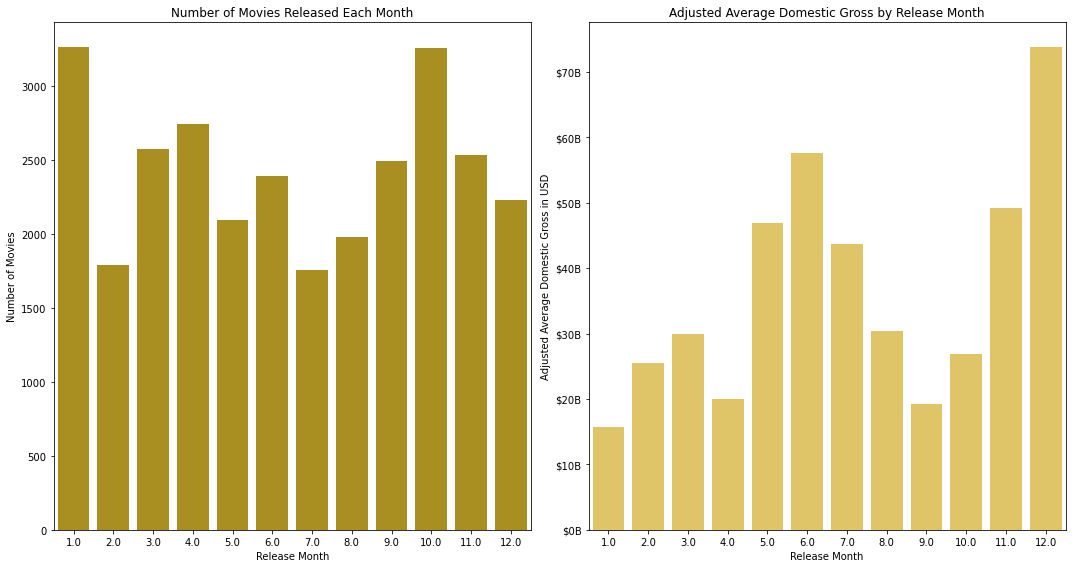

In [81]:
#run the function on release_date_summary
release_month_visual(release_date_summary)

In [82]:
print('Total number of results:', len(top_grossing))
top_grossing

Total number of results: 100


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7073,pinocchio,NaN,1940,1940-02-09,2289247.0,8.430000e+07,84300000.0,1.762201e+09,1.762201e+09,NaN,4.785426e+07,1.714347e+09,97.284405,Profit
7074,fantasia,NaN,1940,1940-11-13,2280000.0,8.332000e+07,83320000.0,1.741715e+09,1.741715e+09,NaN,4.766096e+07,1.694054e+09,97.263562,Profit
5832,the exorcist,NaN,1973,1973-12-26,12000000.0,4.282145e+08,230347346.0,2.822502e+09,1.518295e+09,NaN,7.909595e+07,1.439199e+09,94.790476,Profit
6232,the sound of music,NaN,1965,1965-03-02,8200000.0,2.862143e+08,163214286.0,2.659112e+09,1.516364e+09,NaN,7.618321e+07,1.440181e+09,94.975930,Profit
5831,jaws,NaN,1975,1975-06-20,12000000.0,4.707000e+08,260000000.0,2.560459e+09,1.414318e+09,NaN,6.527621e+07,1.349042e+09,95.384615,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


In [83]:
#create a release_month column
top_grossing['release_month']=pd.DatetimeIndex(top_grossing['release_date']).month

In [84]:
from collections import Counter

def release_month_visual_tg(df):
    # Create a Counter of months from the available data
    months_counter = Counter(df['release_month'])
    print(months_counter)
    # Define all months you want to display
    all_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    # Create counts for all months, filling missing months with zero counts
    counts_per_month = {month: months_counter.get(index + 1, 0) for index, month in enumerate(all_months)}
    print(counts_per_month) 
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=list(counts_per_month.keys()), y=list(counts_per_month.values()),
                     color='goldenrod', label='Number of Movies', ci=None)

    # Set positions and labels for x-axis ticks
    ax.set_xticks(range(len(all_months)))
    ax.set_xticklabels(all_months)

    ax.set_xlabel('Release Month', fontfamily='Arial', fontsize=15)
    ax.set_ylabel('Number of Movies', fontfamily='Arial', fontsize=15)
    ax.set_title('Number of Top Grossing Movies Released Each Month', fontfamily='Arial', fontsize=15)

    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.tight_layout()
    plt.show()


Counter({12.0: 20, 6.0: 17, 5.0: 14, 11.0: 10, 7.0: 10, 2.0: 6, 8.0: 5, 3.0: 5, 10.0: 3, 1.0: 3, 4.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
{'JAN': 3, 'FEB': 6, 'MAR': 5, 'APR': 2, 'MAY': 14, 'JUN': 17, 'JUL': 10, 'AUG': 5, 'SEP': 0, 'OCT': 3, 'NOV': 10, 'DEC': 20}


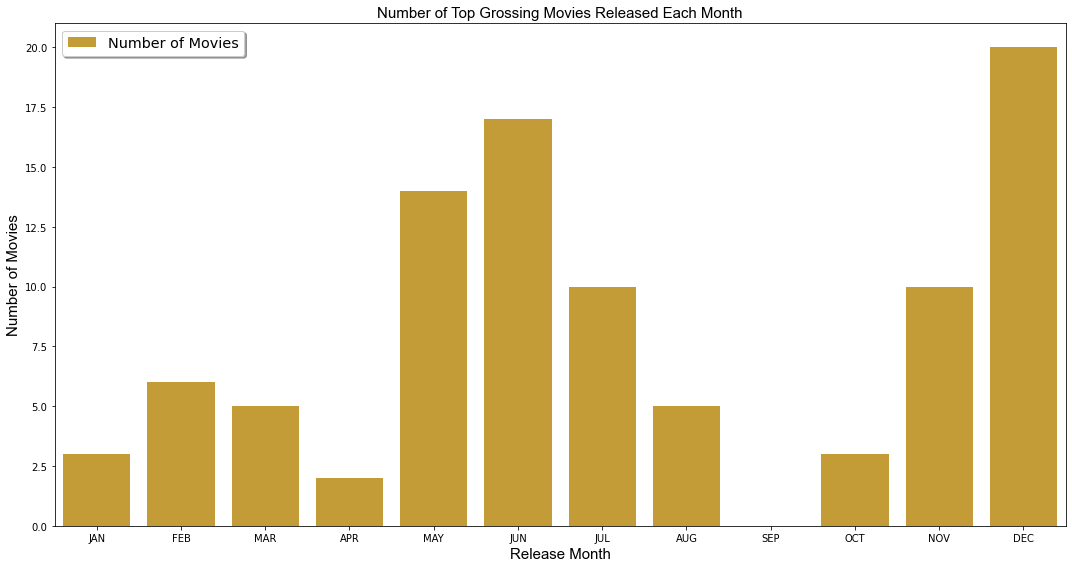

In [85]:
release_month_visual_tg(top_grossing)

This visual somewhat agrees with what was shown previously in that May, June, July, and November/December are the best months to release movies.

### Release Date Summary

This analysis highlights a discernible relationship between the release date and the success of top-grossing movies. It is essential to exercise caution and recognize that additional factors may significantly influence a movie's financial performance such as the economy, viewing platform trends, distribution strategy (wide vs limited release), advertising budget, any award recognition such as a 'movie of the decade,' and the movie's enduring appeal over time are crucial. Goals, such as prioritizing substantial revenue in the short term versus building a more enduring success over the long term, further contribute to the complexity of the potential for a film to maximize ROI. 

Therefore, a comprehensive analysis that incorporates specific factors expressedly communicated by the film company as priorities based on the company staff strengths is essential for a nuanced understanding of the dynamics influencing the financial success of movies is needed to truly forecast the ROI of a new movie.

## Runtime Analysis

Genre can impact the length of a movie. Focusing on the most profitable genres, it can be determined what the most typical runtimes for each genre should be.

Kid and family films are generally 90 minute while action movies tend to be 120 minutes or longer.


In [86]:
# Create a copy of the DataFrame to avoid altering the original
runtime_analysis = main_df_clean.copy()

# Select specific columns to create a new DataFrame
selected_columns = ['title', 'runtime_minutes', 'cpi_avg_domestic_gross', 'genres']

# Create a new DataFrame with only the selected columns
runtime_summary = runtime_analysis[selected_columns].copy()

# Display the new DataFrame
runtime_summary

,title,runtime_minutes,cpi_avg_domestic_gross,genres
0,sunghursh,175.0,NaN,"Action,Crime,Drama"
1,one day before the rainy season,114.0,NaN,"Biography,Drama"
2,sabse bada sukh,NaN,NaN,"Comedy,Drama"
3,the wandering soap opera,80.0,NaN,"Comedy,Drama,Fantasy"
4,a thin life,75.0,NaN,Comedy
...,...,...,...,...
161516,the present,NaN,NaN,NaN
161517,teeth,NaN,NaN,NaN
161518,rumble,NaN,NaN,NaN
161519,endless,NaN,NaN,NaN


In [87]:
#view useful data
runtime_summary[['runtime_minutes', 'title']]

,runtime_minutes,title
0,175.0,sunghursh
1,114.0,one day before the rainy season
2,NaN,sabse bada sukh
3,80.0,the wandering soap opera
4,75.0,a thin life
...,...,...
161516,NaN,the present
161517,NaN,teeth
161518,NaN,rumble
161519,NaN,endless


In [88]:
# % of missing values for genre
(runtime_summary['genres'].isna().sum()/len(runtime_summary)*100).round(2)


14.04

 Genre has a lower percentage of missing values and is not a critical variable so those rows can be dropped.

In [89]:
# Drop rows that contain null values in the 'genre' column
runtime_summary = runtime_summary.dropna(subset=['genres'])


In [90]:
#get statistics for movie runtime
runtime_summary[['title', 'runtime_minutes']].describe()

,runtime_minutes
count,110932.000000
mean,86.295172
std,168.843522
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


There appears to be an outlier because the standard deviation is huge. There potentially aren't too many outliers because the mean and median are close together, so let's take a closer look.

In [91]:
runtime_summary.sort_values(by='runtime_minutes', ascending=False)

,title,runtime_minutes,cpi_avg_domestic_gross,genres
116541,logistics,51420.0,NaN,Documentary
37951,modern times forever,14400.0,NaN,Documentary
108172,nari,6017.0,NaN,Documentary
75288,hunger!,6000.0,NaN,"Documentary,Drama"
76594,london ec1,5460.0,NaN,"Comedy,Drama,Mystery"
...,...,...,...,...
161482,apollo's daring mission,NaN,NaN,Documentary
161493,view from the past,NaN,NaN,Sci-Fi
161496,bad trip,NaN,NaN,Comedy
161497,john leguizamo's latin history for morons,NaN,NaN,Comedy


In [92]:
#make a variable to take a closer look at the outliers
sorted_runtime = runtime_summary.sort_values(by='runtime_minutes', ascending=False)

#run a conditional statement to view some of the outliers
print(len(sorted_runtime[sorted_runtime['runtime_minutes']>180]))
sorted_runtime[sorted_runtime['runtime_minutes']>180]

503


,title,runtime_minutes,cpi_avg_domestic_gross,genres
116541,logistics,51420.0,NaN,Documentary
37951,modern times forever,14400.0,NaN,Documentary
108172,nari,6017.0,NaN,Documentary
75288,hunger!,6000.0,NaN,"Documentary,Drama"
76594,london ec1,5460.0,NaN,"Comedy,Drama,Mystery"
78253,ember glow,4980.0,NaN,"Drama,Western"
12525,deregulation,4200.0,NaN,"Comedy,Drama"
91441,nieuwe tieten,4080.0,NaN,"Documentary,Drama"
10503,city of eternal spring,3450.0,NaN,"Documentary,Drama,News"
57703,a 2nd generation film,3077.0,NaN,Drama


After some internet fact checking, some of the runtime_minutes reported are false. A movie of 300 minutes would mean five hours which is a tremendous underataking for production. So considering that the mean statistics are skewed by these outliers, using the 95% quantile seems like a reasonable cut off for reliably reported film runtimes. 

Additionally, according to the Academy of Motion Picture Arts and Sciences, the American Film Institute and the British Film Institute, a feature film runs for more than 40 minutes.

In [93]:
# Calculate the 5th and 95th percentiles
percentile_5 = runtime_summary['runtime_minutes'].quantile(0.05)
percentile_95 = runtime_summary['runtime_minutes'].quantile(0.95)

# Filter the DataFrame based on the percentiles
runtime_summary_inner_quantile = runtime_summary[((runtime_summary['runtime_minutes'] >= percentile_5) & (runtime_summary['runtime_minutes'] <= percentile_95)) | (runtime_summary['runtime_minutes'].isna())]


In [94]:
runtime_summary_inner_quantile.describe()

,runtime_minutes,cpi_avg_domestic_gross
count,100057.000000,1.848000e+03
mean,84.924663,4.675978e+07
std,19.596128,7.951934e+07
min,43.000000,3.658081e+02
25%,72.000000,6.782861e+05
50%,87.000000,1.507372e+07
75%,98.000000,5.854698e+07
max,130.000000,8.054045e+08


Looking at the inner quantile, these values make much more sense. 

Comparing the two measurements of spread, the standard deviation and the inter quartile range, before we removed the outliers the inter quartile range was 29 to a standard deviation of 169. After removing the outliers the inter quartile range is 26 to a standard deviation of 20. 

This is excellent because for a perfect normal distribution the inter quartile and the standard deviation have a ratio of 1.35.

The inter quartile range is 26 to a standard deviation of 20 and the ratio here is 1.3. So after the removal of the outliers this data can confidently be considered normally distributed. 


In [95]:
# Define function to plot, as I plan to plot runtime for various dataframes

def runtime_visual(df,title):
    ''' Creates a Seaborn histplot of runtime_minutes column'''
    plt.figure(figsize=(15, 8))
    sns.histplot(df['runtime_minutes'], kde=False)
    plt.title(title)
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

In [96]:
def runtime_visual(df, title, plot_range=None):
    ''' Creates a Seaborn histplot of runtime_minutes column within a specified range'''
    plt.figure(figsize=(15, 8))
    
    if plot_range:
        # Filter data within the specified range
        df_filtered = df[(df['runtime_minutes'] >= plot_range[0]) & (df['runtime_minutes'] <= plot_range[1])]
        sns.histplot(df_filtered['runtime_minutes'], kde=False)
        plt.title(f"{title} (Within {plot_range[0]} to {plot_range[1]} Minutes)")
    else:
        sns.histplot(df['runtime_minutes'], kde=False)
        plt.title(title)

    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

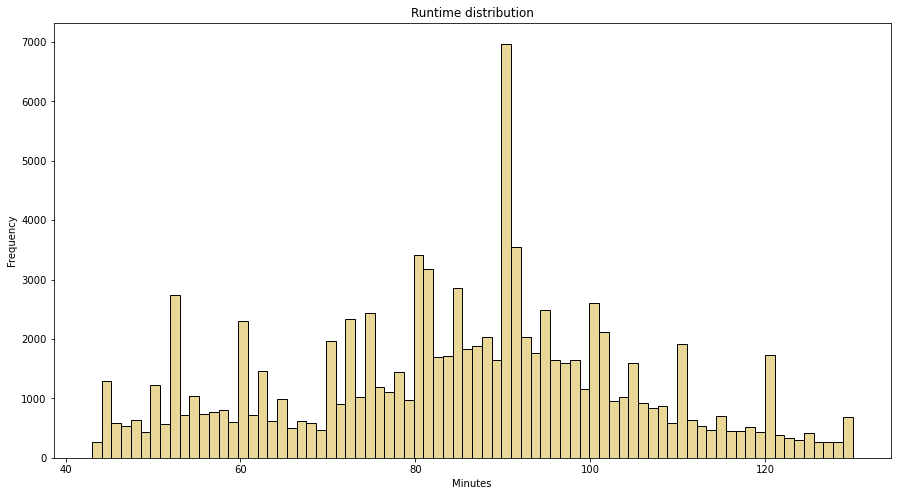

In [97]:
# Call runtime_visual function on movies DataFrame
runtime_visual(runtime_summary_inner_quantile, 'Runtime distribution')


The median is approximately 85 minutes. 

In [98]:
# Get number of missing values per column
runtime_summary_inner_quantile.isna().sum()

title                          0
runtime_minutes            27919
cpi_avg_domestic_gross    126128
genres                         0
dtype: int64

In [99]:
# % of missing values for runtime
(runtime_summary_inner_quantile['runtime_minutes'].isna().sum()/len(runtime_summary_inner_quantile)*100).round(2)

21.82

This is significant because runtime is essential in this part of the analysis. The missing values will have to be filled.

In [100]:
# Consider mean
runtime_summary_inner_quantile['runtime_minutes'].mean().round(2)

84.92

In [101]:
# Consider median
runtime_summary_inner_quantile['runtime_minutes'].median().round(2)

87.0

It is good that both values are about the same. Missing values will be filled with the median of 87 minutes because it is a better option as it is less sensitive to outliers.

In [104]:
#Make a copy to convert from a view to a data frame
runtime_summary_inner_quantile = runtime_summary_inner_quantile.copy()

# Fill missing values with median
runtime_summary_inner_quantile['runtime_minutes'] = runtime_summary_inner_quantile['runtime_minutes'].fillna(runtime_summary_inner_quantile['runtime_minutes'].median())

### Which runtime range receives the highest mean revenue?

I am going to classify runtime into different ranges based on the output from the describe method as shown here:

| Runtime(in minutes) | Range |
|-----------------|-----------------|
| 45-65    | Short    |
| 65-85    | Medium    |
| 85-105    | Long    |
| 105-125    | Very Long   |


In [123]:
# Use the Pandas cut method to map the Runtime into the above ranges
runtime_bin_edges = [45, 65, 85, 105, 125]
runtime_bin_names = ['Short (45-65)', 'Medium (65-85)', 'Long (85-105)', 'Very Long (105-125)']
runtime_summary_inner_quantile['runtime_range'] = pd.cut(runtime_summary_inner_quantile.runtime_minutes, runtime_bin_edges, labels=runtime_bin_names)
runtime_summary_inner_quantile.head()

,title,runtime_minutes,cpi_avg_domestic_gross,genres,runtime_range
1,one day before the rainy season,114.0,NaN,"Biography,Drama",Very Long (105-125)
2,sabse bada sukh,87.0,NaN,"Comedy,Drama",Long (85-105)
3,the wandering soap opera,80.0,NaN,"Comedy,Drama,Fantasy",Medium (65-85)
4,a thin life,75.0,NaN,Comedy,Medium (65-85)
5,bigfoot,87.0,NaN,"Horror,Thriller",Long (85-105)


Counts from DataFrame: Counter({'Long (85-105)': 66479, 'Medium (65-85)': 28414, 'Short (45-65)': 17526, 'Very Long (105-125)': 12480, nan: 3077})
Counts from Graph: {'Short (45-65)': 17526, 'Medium (65-85)': 28414, 'Long (85-105)': 66479, 'Very Long (105-125)': 12480}


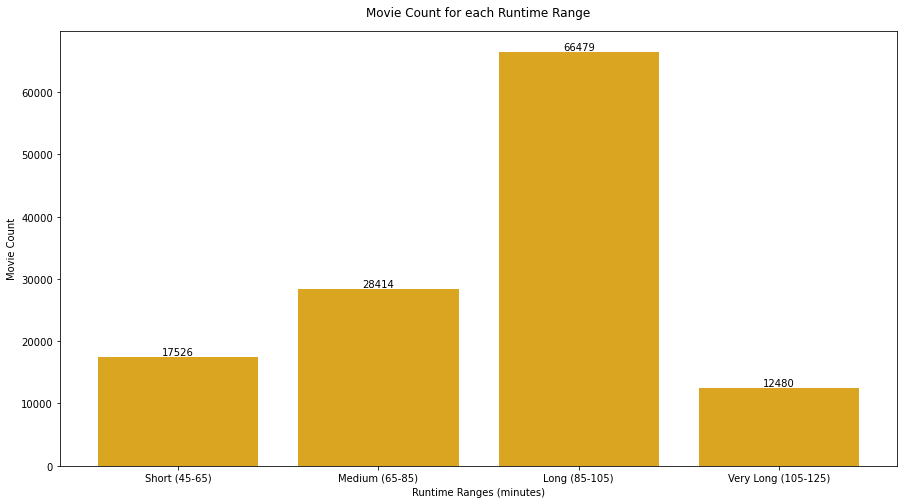

In [124]:
def runtime_bin_visual(df):
    # Create a Counter of runtime ranges from the available data
    bins_counter = Counter(df['runtime_range'])
    
    # Define all bins to display
    all_bins = ['Short (45-65)', 'Medium (65-85)', 'Long (85-105)', 'Very Long (105-125)']
    
    # Create counts for all bins, filling missing bins with zero counts
    counts_per_bin = {bins: bins_counter.get(bins, 0) for bins in all_bins}
    
    # Plot the count of different runtime ranges
    plt.figure(figsize=(15, 8))
    ax = plt.bar(counts_per_bin.keys(), counts_per_bin.values(), color='goldenrod')
    
    plt.ylabel('Movie Count')
    plt.xlabel('Runtime Ranges (minutes)')
    plt.title('Movie Count for each Runtime Range', y=1.02)
    
    # Show the counts on top of the bars
    for i, v in enumerate(counts_per_bin.values()):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
    # Print counts from the DataFrame and the graph
    print("Counts from DataFrame:", bins_counter)
    print("Counts from Graph:", counts_per_bin)
    
    plt.show()

# View dataframe
runtime_bin_visual(runtime_summary_inner_quantile)



Let's see if this pattern follows for the top grossing movies.

In [125]:
print(top_grossing_runtime['runtime_range'].unique())


['Very Long (105-125)', NaN, 'Long (85-105)']
Categories (2, object): ['Long (85-105)' < 'Very Long (105-125)']


Counts from DataFrame: Counter({'Very Long (105-125)': 44, 'Long (85-105)': 42, nan: 14})
Counts from Graph: {'Short (45-65)': 0, 'Medium (65-85)': 0, 'Long (85-105)': 42, 'Very Long (105-125)': 44}


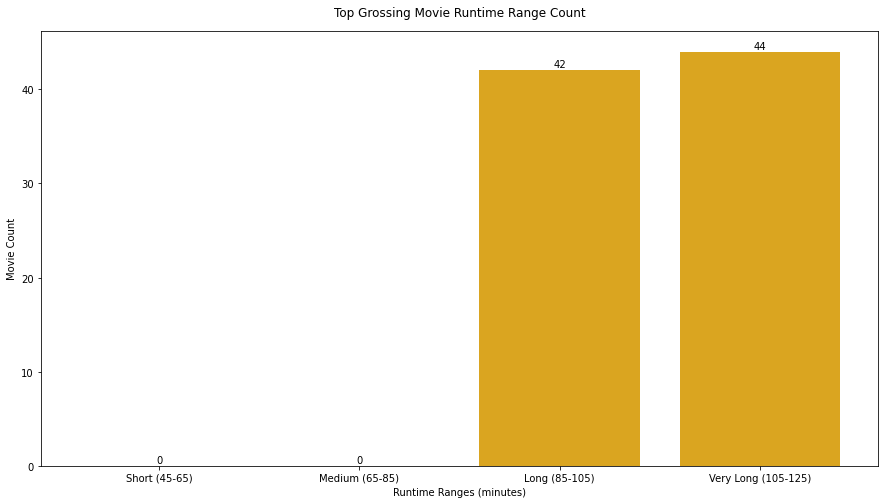

In [126]:
# Set top_grossing_runtime as top 100 movies
top_grossing_runtime = runtime_summary_inner_quantile.sort_values('cpi_avg_domestic_gross', ascending = False)[:100]

def runtime_bin_visual_tg(df):
    # Create a Counter of runtime ranges from the available data
    bins_counter = Counter(df['runtime_range'])
    
    # Define all bins to display
    all_bins = ['Short (45-65)', 'Medium (65-85)', 'Long (85-105)', 'Very Long (105-125)']
    
    # Create counts for all bins, filling missing bins with zero counts
    counts_per_bin = {bins: bins_counter.get(bins, 0) for bins in all_bins}
    
    # Plot the count of different runtime ranges
    plt.figure(figsize=(15, 8))
    ax = plt.bar(counts_per_bin.keys(), counts_per_bin.values(), color='goldenrod')
    
    plt.ylabel('Movie Count')
    plt.xlabel('Runtime Ranges (minutes)')
    plt.title('Top Grossing Movie Runtime Range Count', y=1.02)
    
    # Show the counts on top of the bars
    for i, v in enumerate(counts_per_bin.values()):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
    # Print counts from the DataFrame and the graph
    print("Counts from DataFrame:", bins_counter)
    print("Counts from Graph:", counts_per_bin)
    
    plt.show()

# View dataframe
runtime_bin_visual_tg(top_grossing_runtime)


In [127]:
# Find out which runtime range receives the highest mean gross
runtime_stats = runtime_summary_inner_quantile.groupby('runtime_range')['cpi_avg_domestic_gross'].mean()
print('Total number of results:', len(runtime_stats))
runtime_stats

Total number of results: 4


runtime_range
Short (45-65)          1.356308e+07
Medium (65-85)         1.900260e+07
Long (85-105)          4.171910e+07
Very Long (105-125)    5.379724e+07
Name: cpi_avg_domestic_gross, dtype: float64

These bin categories can be altered to suit the stakeholders budget becuase longer movies may incur larger production budgets. These initial bin category settings are a conservative estimate with respect to what is considered a long movie. This analysis, priortizes bins with an equal width of 20 minute windows. For example, a deeper dive may include eight, 10 minute wide bins.

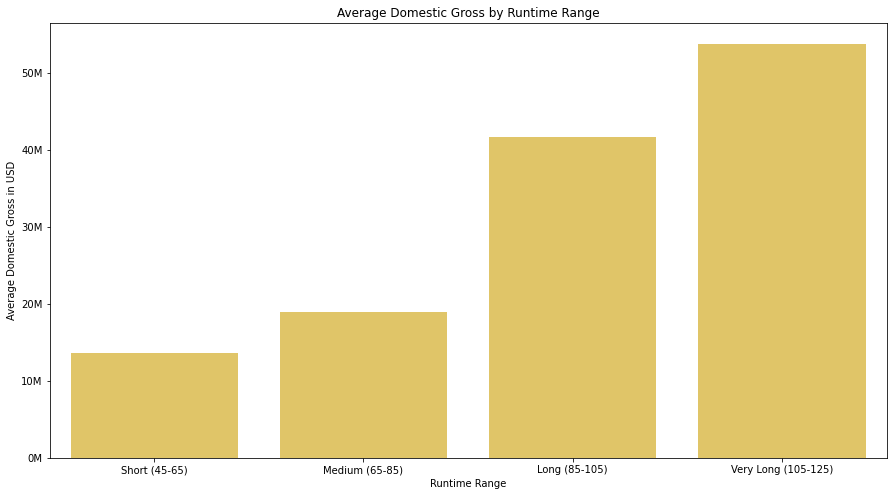

In [136]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot
runtime_stats = runtime_stats.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='runtime_range', y='cpi_avg_domestic_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats)
plt.xlabel('Runtime Range')
plt.ylabel('Average Domestic Gross in USD')
plt.title('Average Domestic Gross by Runtime Range')

# Define a custom formatter function to display values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the millions formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


This shows a clearly consistent result where long and very long movies gross higher than short and medium length movies. Again, let's now compare this to the top 100 grossing movies.

In [143]:
# Find out which runtime range receives the highest mean gross
runtime_stats2 = top_grossing_runtime.groupby('runtime_range')['cpi_avg_domestic_gross'].mean()
print('Total number of results:', len(runtime_stats2))
runtime_stats2

Total number of results: 4


runtime_range
Short (45-65)                   NaN
Medium (65-85)                  NaN
Long (85-105)          2.907383e+08
Very Long (105-125)    3.138787e+08
Name: cpi_avg_domestic_gross, dtype: float64

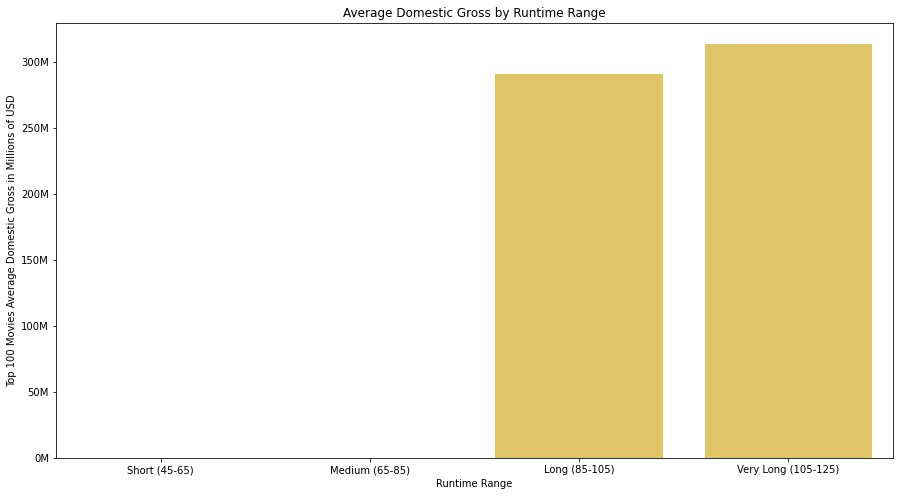

In [144]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot 
runtime_stats2 = runtime_stats2.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='runtime_range', y='cpi_avg_domestic_gross', estimator= sum, ci=None, color='#F4D054', data=runtime_stats2)
plt.xlabel('Runtime Range')
plt.ylabel('Top 100 Movies Average Domestic Gross in Millions of USD')
plt.title('Average Domestic Gross by Runtime Range')

# Define a custom formatter function to display values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the millions formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

As expected, the data supports that the top 100 grossing movies in the long to very long range are likely to have a higher average domestic gross, there for a higher return on investment.

In [145]:
# Close the database connection
conn.close()

## Summary


limitations: 
    1. Actors play a huge role in drawing people to the theater
    2. advestising 
    3. streaming releases
    4. limited theater releases/ cost to theater
    

## References
1. https://pypi.org/project/cpi/#description (CPI)
2. https://sqlite.org/forum/forumpost/2ca63507ad(PRAGMA table)
3. https://stackoverflow.com/questions/24258878/how-to-split-comma-separated-values/32051164#32051164 (SQL split comma separated values)
4. https://www.youtube.com/watch?v=Ohj-CqALrwk (SQL database backend)
5. https://www.youtube.com/watch?v=E-BEOD0EPDA (dataframe -> SQL migration)
6. https://www.sqlitetutorial.net/sqlite-import-csv/ (import CSV to SQL)
7. https://www.youtube.com/watch?v=YyUknBHcZB8 (pandas -> SQL)
8. https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around (glob)
9. https://help.highbond.com/helpdocs/analytics/141/scripting-guide/en-us/Content/lang_ref/functions/r_exclude.htm(exclude function)
10. https://www.geeksforgeeks.org/difference-between-list-and-dictionary-in-python/(list and dictionary background)
11. https://www.youtube.com/watch?v=tATFQUx0Zx0 (more glob)
12. https://developer.imdb.com/non-commercial-datasets/ (IMBd data)
13. https://www.youtube.com/watch?v=THHwJcKfGLQ (tsv -> csv)
14. https://www.pythonpool.com/python-scientific-notation/(number to words coverter)
15. https://www.youtube.com/watch?v=inmMGhYU3uU (reset index)
16. https://www.youtube.com/watch?v=xOoCd5VBzXw(project set up)
17. https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee(movie database support)
18. https://learnsql.com/blog/learn-and-practice-sql-joins/(SQL joins)
19. https://xkcd.com/color/rgb/(xkcd color codes)
20. https://github.com/kimfetti/Videos/blob/master/Seaborn/26_palettes.ipynb(seaborn color codes)
21. https://www.youtube.com/watch?v=Eg0NJcUWLRM(all color codes)
22. https://seaborn.pydata.org/tutorial/color_palettes.html (seaborn pallets)
23. https://gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305 (movie article)
24. https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas (join and merge differences PANDAS)
https://smallbusiness.chron.com/difference-between-profit-profit-margin-1595.html (profit vs profit margin)
https://learngitbranching.js.org/ (visualizing git) 